<a href="https://colab.research.google.com/github/MatheusMol2021/RENEAR/blob/main/ATV0_SEPARADORES_LINEASRES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matheus Inácio Silva Mol
# SEPARADORES LINEASRES


# ATV0_SEPARADORES_LINEASRES
Comparar separadores lineares
Voltar para: Fundamentos
Utilizar uma base de dados multiclasse não sintética para comparar o perceptron linear implementado em classe com outro separador linear do scikit-learn.

Entrega: link para python notebook no GitHub.

## Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
X, y = breast_cancer.data, breast_cancer.target
X.shape, y.shape

((569, 30), (569,))

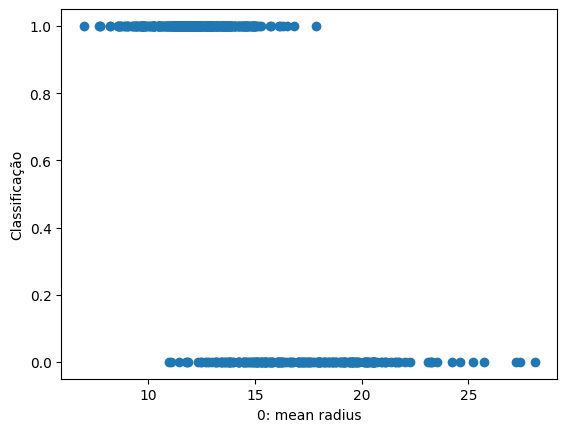

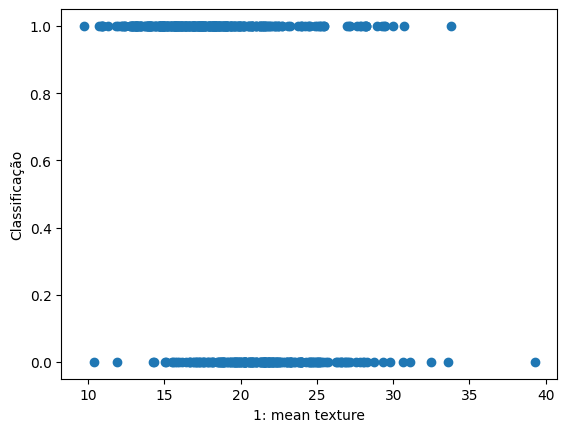

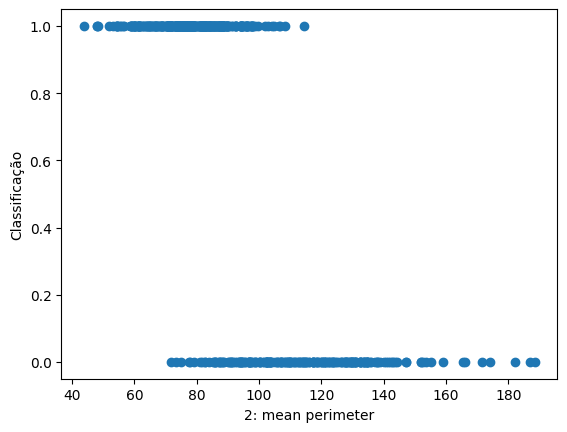

In [3]:
import matplotlib.pyplot as plt
for i in range(3):
    plt.xlabel(f"{i}: {breast_cancer.feature_names[i]}")
    plt.ylabel("Classificação")
    plt.scatter(X[:,i], y)
    plt.show()

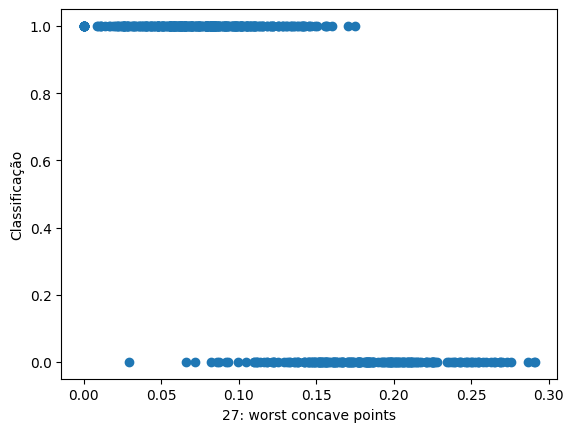

In [4]:
X27 = X[:,27:28]
plt.xlabel(f"27: {breast_cancer.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27, y)
plt.show()

## Classificador ScikitLearn

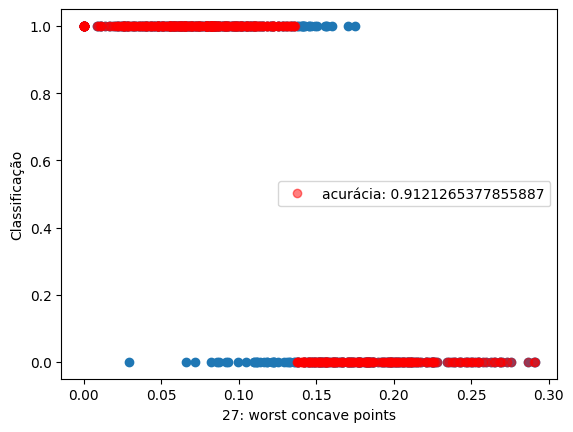

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

class ClassificadorLinear():
    def __init__(self):
        self.lrmodel = LinearRegression()
    def fit(self, X, y):
        self.lrmodel.fit(X,y)
    def predict(self, X):
        ypred = self.lrmodel.predict(X)
        ypred = (ypred>0.5).astype(int)
        return ypred

plt.xlabel(f"27: {breast_cancer.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27, y)
modelo = ClassificadorLinear()
modelo.fit(X27,y)
ypred = modelo.predict(X27)
acuracia = accuracy_score(y, ypred)
plt.plot(X27, ypred, 'ro', label=f"acurácia: {acuracia}", alpha=0.5)
plt.legend()
plt.show()

In [6]:
acuracia = sum(y==ypred)/len(y)
acuracia

0.9121265377855887

## Classificador PERCEPTRON

In [7]:
def sign(a):
  return (a >= 0) * 2 - 1
  
def accuracy(yactual, ypred):
  return sum(yactual == ypred)/len(yactual)

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random
import numpy as np


def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
     self.w = None
     self.activation = sign
     self.max_iter = max_iter

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      self.w += Xb.T @ erros

  def predict(self, X):
    Xb = include_bias(X)
    a = Xb @ self.w
    ypred = self.activation(a)
    return ypred

Xtr = X27
ytr = y

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)

0.6274165202108963
[ 203.23002061 -944.37048489]


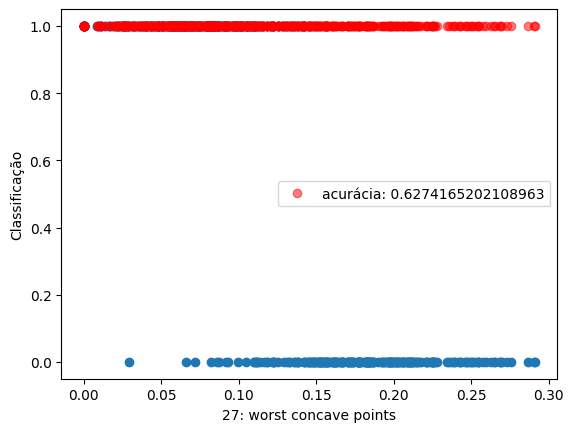

In [9]:
plt.xlabel(f"27: {breast_cancer.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27, y)
perceptron = Perceptron()
perceptron.fit(X27,y)
ypred = perceptron.predict(X27)
acuracia = accuracy_score(y, ypred)
plt.plot(X27, ypred, 'ro', label=f"acurácia: {acuracia}", alpha=0.5)
plt.legend()
plt.show()